In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
import sys
import os

In [15]:
sns.set_style("whitegrid")

# os.listdir(os.getcwd())

files = [] # get filepaths

for i, file in enumerate(os.listdir(os.getcwd())):
    if file.endswith(".csv"):
        files.append(file)
        
files

['DistanceTest_2019_11_26_11_38_30_Run1.csv',
 'DistanceTest_2019_11_26_11_44_18_Run2.csv',
 'DistanceTest_2019_11_26_11_48_46_Run3.csv',
 'DistanceTest_2019_11_26_11_49_57_Run4.csv',
 'DistanceTest_2019_11_26_11_52_11_Run5.csv',
 'DistanceTest_2019_11_26_11_53_40_Run6.csv',
 'DistanceTest_2019_11_26_11_55_33_Run7.csv',
 'DistanceTest_2019_11_26_11_57_38_Run8.csv',
 'DistanceTest_2019_11_26_11_59_33_Run9.csv',
 'DistanceTest_2019_11_26_12_00_50_Run10.csv']

   Time (s)  Range (mm)  Range Avg 3 (mm)  Range Avg 5 (mm)  Range Avg 8 (mm)  \
0      0.58          44               NaN               NaN               NaN   
1      0.89          42               NaN               NaN               NaN   
2      1.07          45         43.666667               NaN               NaN   
3      1.71          42         43.000000               NaN               NaN   
4      1.87          44         43.666667              43.4               NaN   
5      2.02          42         42.666667              43.0               NaN   
6      2.17          43         43.000000              43.2               NaN   
7      2.32          43         42.666667              42.8            43.125   
8      2.49          43         43.000000              43.0            43.000   
9      2.64          42         42.666667              42.6            43.000   

   Range Avg 10 (mm)  Lumens (0dB)  Velocity Avg 3 (mm/s)  \
0                NaN         20.48             

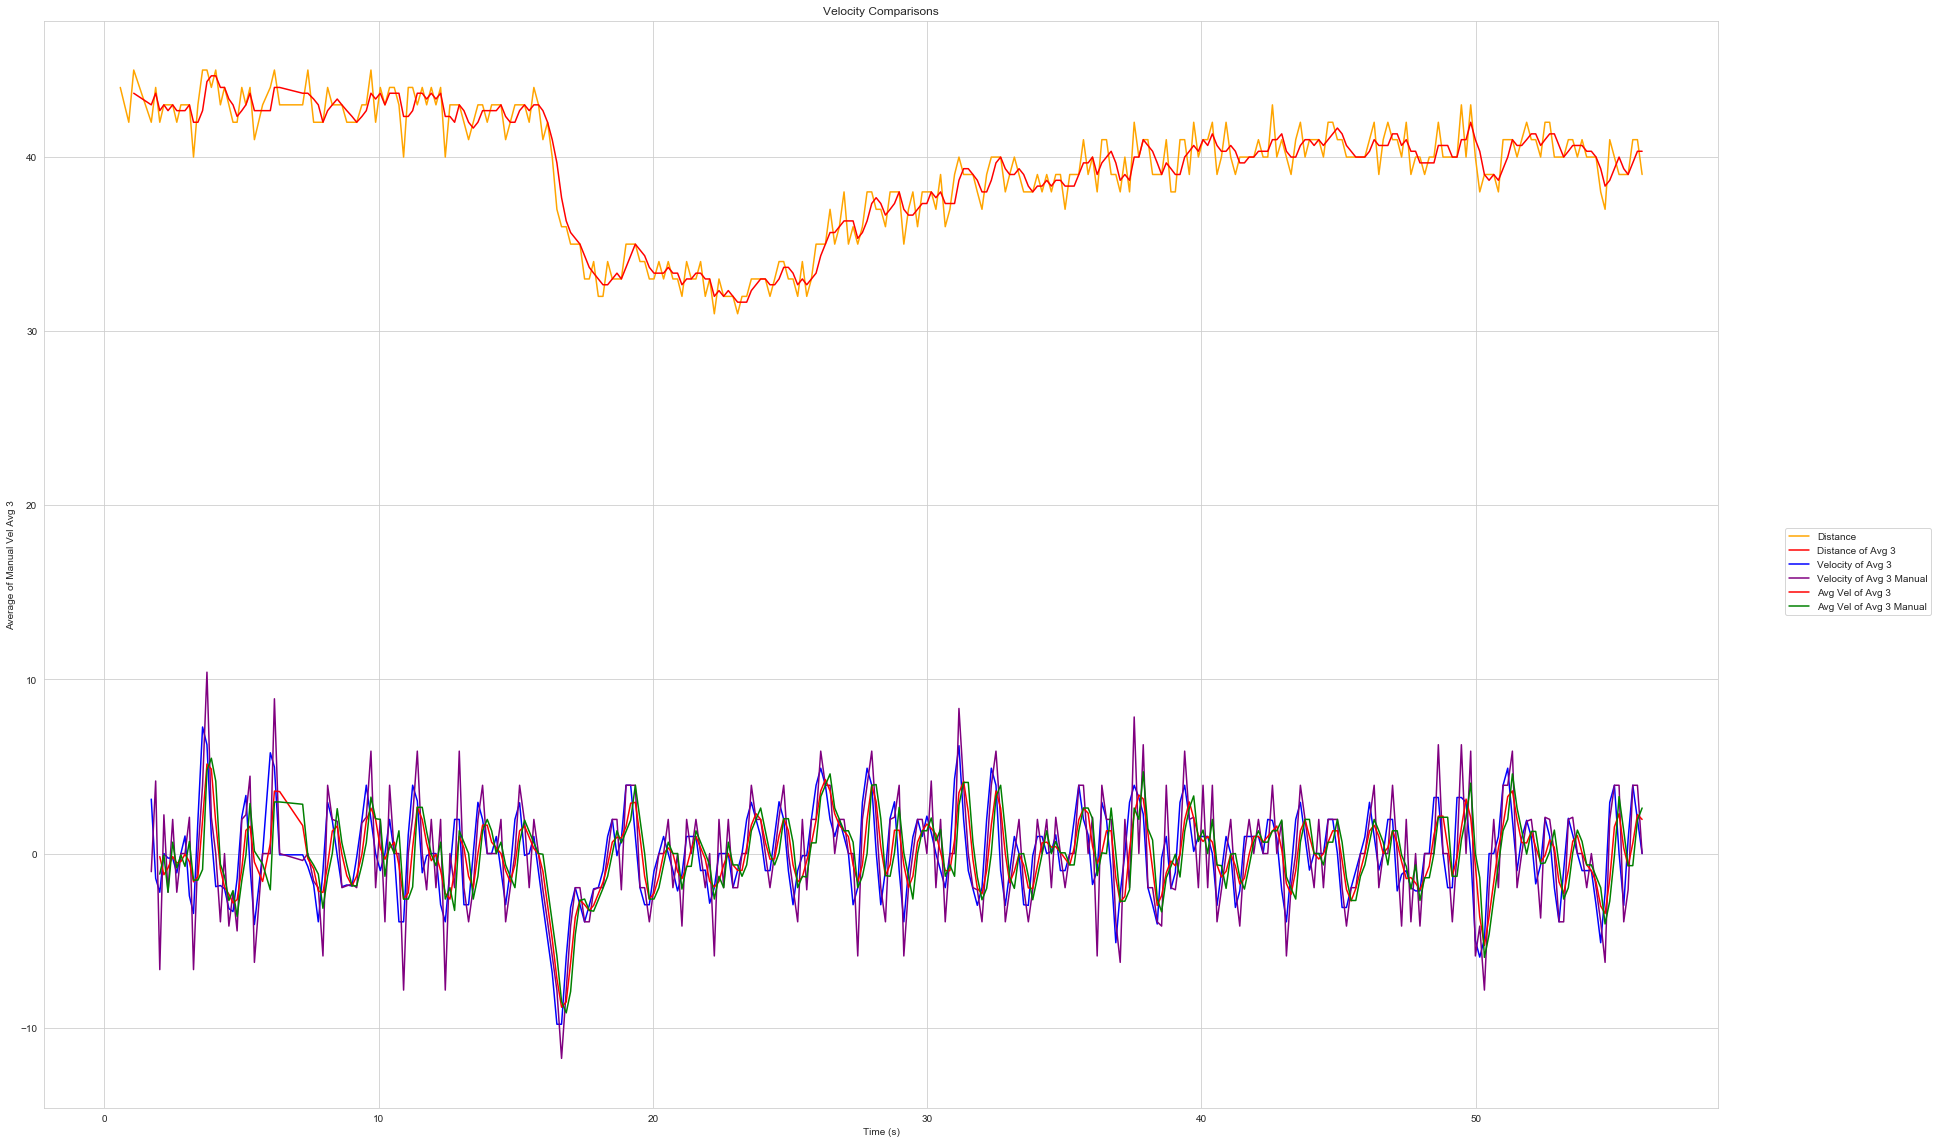

In [44]:
lowLim = 30;
upLim = 50;

for file in files:
    dfOriginal = pd.read_csv(file, encoding = 'utf-8')

#     print(dfOriginal.head())

#     ax = sns.scatterplot(x = "Time (s)", y = "Range (mm)", data = dfOriginal, hue = "Range (mm)")
#     ax.set_ylim([lowLim, upLim])
#     plt.title("PLOT ORIGINAL")
#     plt.yticks(np.arange(lowLim, upLim, step = 2))

#     fig = plt.gcf() # get current figures
#     fig.set_size_inches(20, 10)
#     plt.close()

    dfAveraged = dfOriginal

    try:
        dfAveraged.insert(2, "Range Avg 3 (mm)", value = np.NaN)
        dfAveraged.insert(3, "Range Avg 5 (mm)", value = np.NaN)
        dfAveraged.insert(4, "Range Avg 8 (mm)", value = np.NaN)
        dfAveraged.insert(5, "Range Avg 10 (mm)", value = np.NaN)
    except ValueError:
        pass

    dfAveraged["Range Avg 3 (mm)"] = dfAveraged.rolling(window = 3)["Range (mm)"].mean() 
    dfAveraged["Range Avg 5 (mm)"] = dfAveraged.rolling(window = 5)["Range (mm)"].mean() 
    dfAveraged["Range Avg 8 (mm)"] = dfAveraged.rolling(window = 8)["Range (mm)"].mean() 
    dfAveraged["Range Avg 10 (mm)"] = dfAveraged.rolling(window = 10)["Range (mm)"].mean() 

    # Take time derivatives to get velocity
    dfAveraged["Velocity Avg 3 (mm/s)"] = np.gradient(dfAveraged["Range Avg 3 (mm)"], dfAveraged["Time (s)"])
    dfAveraged["Velocity Avg 10 (mm/s)"] = np.gradient(dfAveraged["Range Avg 10 (mm)"], dfAveraged["Time (s)"])
    dfAveraged["Velocity Avg 3 Manual (mm/s)"] = dfAveraged["Range Avg 3 (mm)"].diff()/(dfAveraged["Time (s)"].diff())
    
    # Get averages of velocity to smoothen
    
    dfAveraged["Average of Vel Avg 3"] = dfAveraged.rolling(window = 3)["Velocity Avg 3 (mm/s)"].mean()
    dfAveraged["Average of Manual Vel Avg 3"] = dfAveraged.rolling(window = 3)["Velocity Avg 3 Manual (mm/s)"].mean()

    print(dfAveraged.head(10))
    
    # Plot stuff
    ax = sns.lineplot(x = "Time (s)", y = "Range (mm)", data = dfOriginal, color = "orange")
    ax = sns.lineplot(x = "Time (s)", y = "Range Avg 3 (mm)", data = dfOriginal, color = "red")
    ax = sns.lineplot(x = "Time (s)", y = "Velocity Avg 3 (mm/s)", data = dfOriginal, color = "blue")
    ax = sns.lineplot(x = "Time (s)", y = "Velocity Avg 3 Manual (mm/s)", data = dfOriginal, color = "purple")
    ax = sns.lineplot(x = "Time (s)", y = "Average of Vel Avg 3", data = dfOriginal, color = "red")
    ax = sns.lineplot(x = "Time (s)", y = "Average of Manual Vel Avg 3", data = dfOriginal, color = "green")
    
    fig = plt.gcf() # get current figures
    fig.legend(labels = ["Distance", "Distance of Avg 3", "Velocity of Avg 3", "Velocity of Avg 3 Manual", \
                        "Avg Vel of Avg 3", "Avg Vel of Avg 3 Manual"], loc = "right")
    fig.set_size_inches(30, 20)
    plt.title("Velocity Comparisons")
    
    # Save file
    file = file[:-4] # remove last 4 chars or ".txt"
    fig.savefig(file + "_Velocities_" + ".pdf", dpi = 2400)
    print("Figure saved")
    
    break
    
    # To plot and save averaged data
#     ax = sns.lineplot(x = "Time (s)", y = "Range (mm)", data = dfOriginal, color = "orange")
#     ax = sns.lineplot(x = "Time (s)", y = "Range Avg 3 (mm)", data = dfOriginal, color = "purple")
#     ax = sns.lineplot(x = "Time (s)", y = "Range Avg 5 (mm)", data = dfOriginal, color = "red")
#     ax = sns.lineplot(x = "Time (s)", y = "Range Avg 8 (mm)", data = dfOriginal, color = "blue")
#     ax = sns.lineplot(x = "Time (s)", y = "Range Avg 10 (mm)", data = dfOriginal, color = "green")

#     ax.set_ylim([lowLim, upLim])
#     plt.title("PLOT RUNNING AVERAGES")
#     plt.ylabel("Distance (mm)")
#     plt.yticks(np.arange(lowLim, upLim, step = 1))

#     fig = plt.gcf() # get current figures
#     fig.legend(labels = ["Original", "Average of 3", "Average of 5", "Average of 8", "Average of 10"], loc = "right")
#     fig.set_size_inches(20, 10)

#     currentDT = datetime.now()
#     file = file[:-4] # remove last 4 chars or ".txt"
#     fig.savefig(file + ".pdf", dpi = 2400)
#     print("Figure saved")
#     plt.close()